## **Objective:** To determine if the performance of an Airline depends on expenditure towards a Pilot or Aircraft maintenance



### Tasks:
1. Calculate CASM for Pilot & Maintenance
2. Merge CASM data by airline and Year: X in airline groups & year
3. Merge OTP by airline and Year: no of flights, no of delays, % of delay 
4. Model: X - CASM by airline group & by Year
Y - % of delay

## Import libraries

In [ ]:
#Import libraries
import pandas as pd
import re
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install linearmodels

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Curate

### Load Data

In [ ]:
#Create data folder in drive
datafolder = Path("/content/drive/My Drive/Airline_Project")

#Read data for all airlines
xls = pd.ExcelFile(datafolder/"Airline_data.xlsx")
AA = pd.read_excel(xls, "AA")
Delta = pd.read_excel(xls, "Delta")
United = pd.read_excel(xls, "United")
Southwest = pd.read_excel(xls, "Southwest")
Alaska = pd.read_excel(xls, "Alaska")

In [ ]:
AA.head()

,Unnamed: 0,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 25
0,Small Narrowbodies,2727395,2922682,3236620,3139328,3133640,3671099,3551245,3857271,3423375,...,3306264,3511299,2956391,2580490,2365103,3331281,2576865,2533027,2875482,NaN
1,Pilots (000),831685,809613,947192,999080,1015762,1098588,1003004,1102619,1062592,...,591890,533322,410575,382803,400297,738633,649094,606650,631461,NaN
2,Salaries and Wages (000),585946,576560,650721,673778,659608,705398,631069,697937,692430,...,370480,329631,273849,267706,279599,511416,468359,432063,443201,NaN
3,Pilot Training (000),19691,20225,58176,70075,89022,100160,97304,77463,30422,...,18742,18385,15746,15868,16967,30928,27672,26710,27251,NaN
4,Benefits and Payroll Taxes (000),187623,174610,192649,203955,204684,226511,216527,274305,294075,...,174150,158108,97776,76661,80288,158345,122166,117379,126951,NaN


In [ ]:
AA.columns

Index([ 'Unnamed: 0',          1995,          1996,          1997,
                1998,          1999,          2000,          2001,
                2002,          2003,          2004,          2005,
                2006,          2007,          2008,          2009,
                2010,          2011,          2012,          2013,
                2014,          2015,          2016,          2017,
                2018, 'Unnamed: 25'],
      dtype='object')

### Clean cost data

In [ ]:
Year = list(np.arange(2003,2019))

In [ ]:
def cleaned_df(df):
  df = df.iloc[:,[0,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]]
  df = df.iloc[[118,127,152]]
  df.rename(columns={'Unnamed: 0': 'Year'},inplace=True)
  df['Year'] = df['Year'].replace(['Pilots (000)','Maintenance (000)'],['TotalFleet_Pilot', 'TotalFleet_Maintenance'])
  df = df.transpose()
  df = df.rename(columns=df.iloc[0])
  df = df[1:]
  df['Year'] = Year
  df['CASM_Pilot'] = df['TotalFleet_Pilot']/df['ASMs']*10000 ## For better visualization
  df['CASM_Maintenance'] = df['TotalFleet_Maintenance']/df['ASMs']*10000 ## For better visualization
  df=df.drop(columns=['TotalFleet_Pilot',"TotalFleet_Maintenance", 'ASMs']	 )
  
  return(df)



In [ ]:
AA_cleaned = cleaned_df(AA)
AA_cleaned

,Year,CASM_Pilot,CASM_Maintenance
2003,2003,0.131159,0.111647
2004,2004,0.115382,0.107411
2005,2005,0.111425,0.108127
2006,2006,0.109647,0.1136
2007,2007,0.110759,0.115467
2008,2008,0.11155,0.133682
2009,2009,0.115964,0.146717
2010,2010,0.115705,0.151694
2011,2011,0.117865,0.15133
2012,2012,0.10692,0.15049


In [ ]:
type(AA_cleaned['CASM_Pilot'])

pandas.core.series.Series

In [ ]:
Delta_cleaned = cleaned_df(Delta)
United_cleaned = cleaned_df(United)
Southwest_cleaned = cleaned_df(Southwest)
Alaska_cleaned = cleaned_df(Alaska)

In [ ]:
AA_cleaned['airline']= 'american_airline'
Delta_cleaned['airline']= 'delta'
United_cleaned['airline']= 'united'
Southwest_cleaned['airline']= 'southwest'
Alaska_cleaned['airline']= 'alaska'

### Calculate CASM & Merge data

In [ ]:
df = pd.concat([AA_cleaned, Delta_cleaned, United_cleaned, Southwest_cleaned, Alaska_cleaned])

In [ ]:
df

,Year,CASM_Pilot,CASM_Maintenance,airline
2003,2003,0.131159,0.111647,american_airline
2004,2004,0.115382,0.107411,american_airline
2005,2005,0.111425,0.108127,american_airline
2006,2006,0.109647,0.1136,american_airline
2007,2007,0.110759,0.115467,american_airline
...,...,...,...,...
2014,2014,0.124973,0.086864,alaska
2015,2015,0.121211,0.08328,alaska
2016,2016,0.118463,0.078966,alaska
2017,2017,0.128524,0.08809,alaska


In [ ]:
df.sample(5)

,Year,CASM_Pilot,CASM_Maintenance,airline
2007,2007,0.115978,0.102454,alaska
2006,2006,0.116869,0.111199,alaska
2012,2012,0.118294,0.120538,delta
2008,2008,0.11155,0.133682,american_airline
2013,2013,0.107592,0.145717,american_airline


### Clean OTP data

In [ ]:
#Read data for all OTP
xls = pd.ExcelFile(datafolder/"OTP.xlsx")
AAOTP = pd.read_excel(xls, "AA")
DeltaOTP = pd.read_excel(xls, "Delta")
UnitedOTP = pd.read_excel(xls, "United")
SouthwestOTP = pd.read_excel(xls, "Southwest")
AlaskaOTP = pd.read_excel(xls, "Alaska")

In [ ]:
def cleaned_otp(df):
  df = df.iloc[:,[0,6,7]]
  df.dropna()
  df = df.groupby('year').sum()
  df = df.iloc[:-3]
  df['pc_delay'] = df['arr_del15'] / df['arr_flights'] * 100
  df['Year'] = Year
  df = df.drop(columns = ['arr_del15', 'arr_flights'])
  df.reset_index()
  return df

In [ ]:
aa_otp = cleaned_otp(AAOTP)
alaska_otp = cleaned_otp(AlaskaOTP)
delta_otp = cleaned_otp(DeltaOTP)
sw_otp = cleaned_otp(SouthwestOTP)
united_otp = cleaned_otp(UnitedOTP)

In [ ]:
aa_otp

,pc_delay,Year
year,,
2003,18.807151,2003
2004,21.208278,2004
2005,21.436408,2005
2006,22.617104,2006
2007,28.102395,2007
2008,26.951239,2008
2009,20.774406,2009
2010,18.320661,2010
2011,19.320338,2011


In [ ]:
aa_otp.columns

Index(['pc_delay', 'Year'], dtype='object')

In [ ]:
aa_otp['airline'] = "american_airline"
alaska_otp['airline'] = "alaska"
delta_otp['airline'] = "delta"
sw_otp['airline'] = "southwest"
united_otp['airline'] = "united"

In [ ]:
otp = pd.concat([aa_otp, alaska_otp, delta_otp, sw_otp, united_otp])

In [ ]:
otp

,pc_delay,Year,airline
year,,,
2003,18.807151,2003,american_airline
2004,21.208278,2004,american_airline
2005,21.436408,2005,american_airline
2006,22.617104,2006,american_airline
2007,28.102395,2007,american_airline
...,...,...,...
2014,22.281411,2014,united
2015,20.305862,2015,united
2016,17.032952,2016,united


### Merge cost + OTP data

In [ ]:
data = pd.merge(df, otp)

In [ ]:
data.head(30)

,Year,CASM_Pilot,CASM_Maintenance,airline,pc_delay
0,2003,0.131159,0.111647,american_airline,18.807151
1,2004,0.115382,0.107411,american_airline,21.208278
2,2005,0.111425,0.108127,american_airline,21.436408
3,2006,0.109647,0.1136,american_airline,22.617104
4,2007,0.110759,0.115467,american_airline,28.102395
5,2008,0.11155,0.133682,american_airline,26.951239
6,2009,0.115964,0.146717,american_airline,20.774406
7,2010,0.115705,0.151694,american_airline,18.320661
8,2011,0.117865,0.15133,american_airline,19.320338
9,2012,0.10692,0.15049,american_airline,20.896386


# Analyze: 

### 1) Show the relationship between airline on time performance and the major CASM buckets of Pilot Costs and Maintenance

### EDA

#### First, we will compare statistics across 5 airlines.

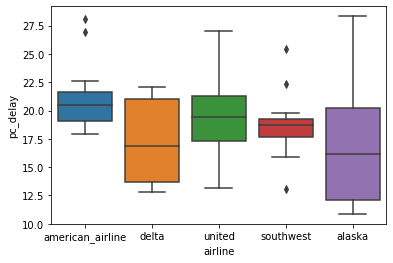

In [ ]:
sns.boxplot(x=data['airline'], y=data['pc_delay'])

** Percentage of delay:

As we can see from the box plot, Alaska airline has the widest spread of delay. Delta and Alaska have a similar lowest average of delay percentage at around 17%. Given all factors the same, American Airlines have the highest chance of delay at 21% and Delta is the best choice for lowest chance of delay.

** CASM Pilot

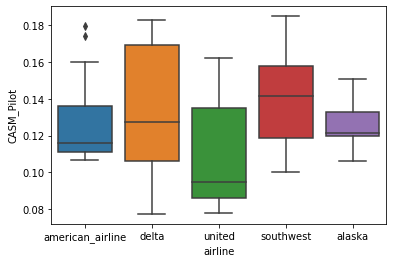

In [ ]:
sns.boxplot(x=data['airline'], y=data['CASM_Pilot'])

United Airlines is the most cost efficient in terms of Pilot cost per ASM. Southwest has the highest Pilot cost per ASM

** CASM Maintenance

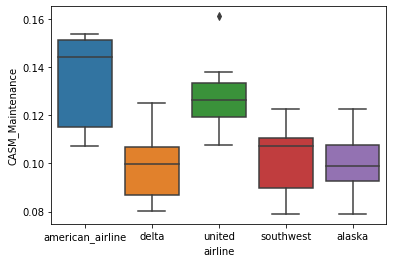

In [ ]:
sns.boxplot(x=data['airline'], y=data['CASM_Maintenance'])

Delta and Alaska are the most cost efficient in terms of Maintenance cost per ASM. American airline has the highest Maintenance cost per ASM. This could be correlated with its highest chance of delay which we will explore later in our analysis.
 

### 2) Compute the change in OTP from one period to the next and the change in CASM for both Pilot and Maintenance.

#### Now we will look at the trend over the years considered for each airline.

In [ ]:
aa_plot = data.loc[data['airline'] == 'american_airline']
delta_plot = data.loc[data['airline'] == 'delta']
united_plot = data.loc[data['airline'] == 'united']
sw_plot = data.loc[data['airline'] == 'southwest']
alaska_plot = data.loc[data['airline'] == 'alaska']


American Airline:

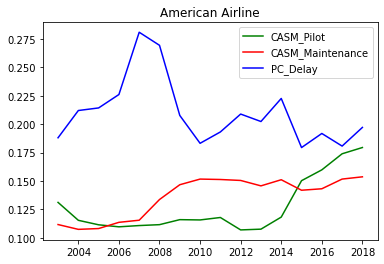

In [ ]:
# Importing packages
import matplotlib.pyplot as plt

# Define data values
x = aa_plot['Year']
y = aa_plot['CASM_Pilot']
z = aa_plot['CASM_Maintenance']
c = aa_plot['pc_delay']/100


# Plot a simple line chart
plt.plot(x, y, 'g', label='CASM_Pilot')

# Plot another line on the same chart/graph
plt.plot(x, z, 'r', label='CASM_Maintenance')

# Plot another line on the same chart/graph
plt.plot(x, c, 'b', label='PC_Delay')

plt.legend()
plt.title("American Airline")
plt.show()



Delta

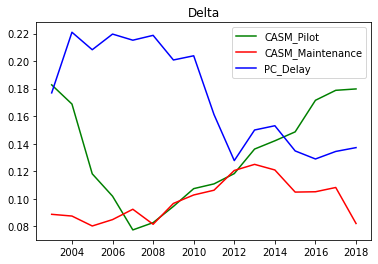

In [ ]:
# Define data values
x = delta_plot['Year']
y = delta_plot['CASM_Pilot']
z = delta_plot['CASM_Maintenance']
c = delta_plot['pc_delay']/100


# Plot a simple line chart
plt.plot(x, y, 'g', label='CASM_Pilot')

# Plot another line on the same chart/graph
plt.plot(x, z, 'r', label='CASM_Maintenance')

# Plot another line on the same chart/graph
plt.plot(x, c, 'b', label='PC_Delay')

plt.legend()
plt.title("Delta")
plt.show()

United

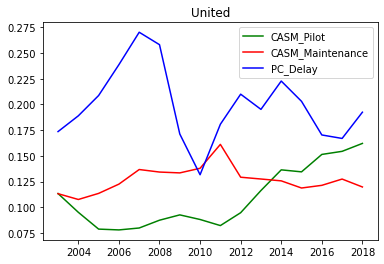

In [ ]:
# Define data values
x = united_plot['Year']
y = united_plot['CASM_Pilot']
z = united_plot['CASM_Maintenance']
c = united_plot['pc_delay']/100


# Plot a simple line chart
plt.plot(x, y, 'g', label='CASM_Pilot')

# Plot another line on the same chart/graph
plt.plot(x, z, 'r', label='CASM_Maintenance')

# Plot another line on the same chart/graph
plt.plot(x, c, 'b', label='PC_Delay')

plt.legend()
plt.title("United")
plt.show()

Southwest

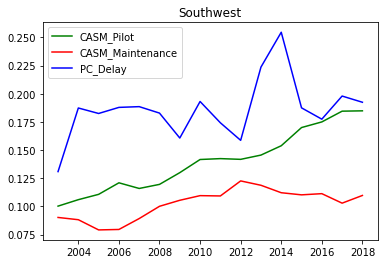

In [ ]:
# Define data values
x = sw_plot['Year']
y = sw_plot['CASM_Pilot']
z = sw_plot['CASM_Maintenance']
c = sw_plot['pc_delay']/100


# Plot a simple line chart
plt.plot(x, y, 'g', label='CASM_Pilot')

# Plot another line on the same chart/graph
plt.plot(x, z, 'r', label='CASM_Maintenance')

# Plot another line on the same chart/graph
plt.plot(x, c, 'b', label='PC_Delay')

plt.legend()
plt.title("Southwest")
plt.show()

Alaska

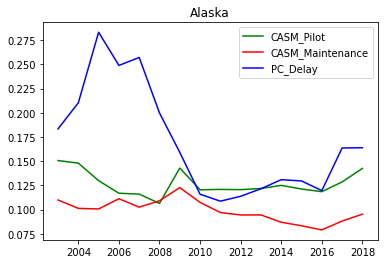

In [ ]:
# Define data values
x = alaska_plot['Year']
y = alaska_plot['CASM_Pilot']
z = alaska_plot['CASM_Maintenance']
c = alaska_plot['pc_delay']/100


# Plot a simple line chart
plt.plot(x, y, 'g', label='CASM_Pilot')

# Plot another line on the same chart/graph
plt.plot(x, z, 'r', label='CASM_Maintenance')

# Plot another line on the same chart/graph
plt.plot(x, c, 'b', label='PC_Delay')

plt.legend()
plt.title("Alaska")
plt.show()

###Scatter and line plot for percent_delays with CASM_Pilot and CASM_Maintenance

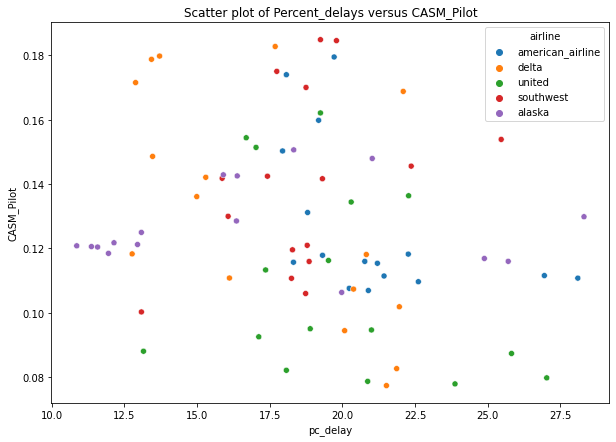

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=data['pc_delay'],  
                y=data['CASM_Pilot'],
                hue=data['airline']).set(title=                
                'Scatter plot of Percent_delays versus CASM_Pilot') 
plt.show()

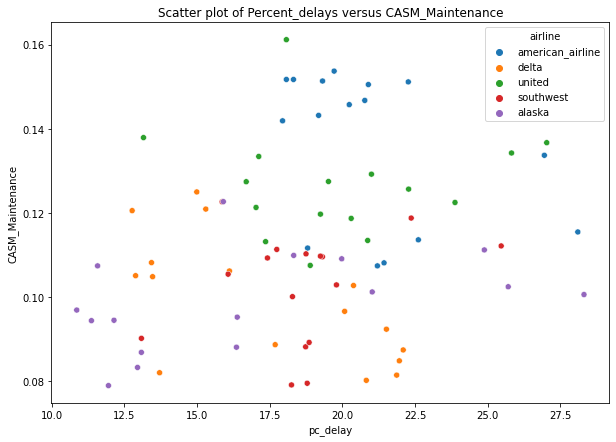

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=data['pc_delay'],  
                y=data['CASM_Maintenance'],
                hue=data['airline']).set(title=                
                'Scatter plot of Percent_delays versus CASM_Maintenance') 
plt.show()

### Check correlation

In [ ]:
cor = data.iloc[:,[2,3,8]]

In [ ]:
cor['CASM_Pilot'] = cor['CASM_Pilot'].astype(float)
cor['CASM_Maintenance'] = cor['CASM_Maintenance'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


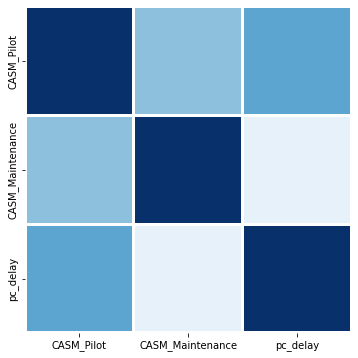

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(cor.corr(method = "pearson").round(2), cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues')
plt.show()

The heatmap above shows that CASM_Pilot has higher correlation with delay percentage than CASM_Maintenance. We will analyse more in the below models.

## Analysing using different Models.

### Null hypothesis (Ho): On-time performance does not affect the cost per seat mile(CASM) of Pilot and Maintenance

### 1) PooledOLS Model

In [ ]:
data = pd.read_csv(datafolder/'df_airline.csv')

In [ ]:
import statsmodels.api as sm

In [ ]:
data.head()

,airline,year,CASM_Pilot,CASM_Maintenance,CASM_Pilot2,CASM_Maintenance2,CASM_Pilot_CASM_Maintenance,arr_flights,pc_delay,CASM_Pilot_change,CASM_Maintenance_change,pc_delay_change
0,aa,2004,1.153816,1.074108,1.331292,1.153708,1.239323,698548.000000,-0.212083,NaN,NaN,NaN
1,aa,2005,1.114248,1.081270,1.241548,1.169145,1.204803,674225.085698,-0.214352,-0.034293,0.006668,0.010699
2,aa,2006,1.096469,1.135995,1.202245,1.290485,1.245584,643597.000000,-0.226171,-0.015956,0.050612,0.055139
3,aa,2007,1.107587,1.154670,1.226748,1.333263,1.278897,633857.000000,-0.281024,0.010139,0.016439,0.242528
4,aa,2008,1.115502,1.336820,1.244345,1.787087,1.491225,604885.000000,-0.269950,0.007147,0.157750,-0.039405


In [ ]:
data['Log_CASM_Maintenance'] = np.log((data['CASM_Maintenance']).astype(float))

In [ ]:
data['Log_CASM_Pilot'] = np.log((data['CASM_Pilot']).astype(float))

In [ ]:
dataOLSnew = data.set_index(["airline","year"])

In [ ]:
dataOLSnew.head()

CASM_Pilot  CASM_Maintenance  CASM_Pilot2  CASM_Maintenance2  \
airline year                                                                 
aa      2004    1.153816          1.074108     1.331292           1.153708   
        2005    1.114248          1.081270     1.241548           1.169145   
        2006    1.096469          1.135995     1.202245           1.290485   
        2007    1.107587          1.154670     1.226748           1.333263   
        2008    1.115502          1.336820     1.244345           1.787087   

              CASM_Pilot_CASM_Maintenance    arr_flights  pc_delay  \
airline year                                                         
aa      2004                     1.239323  698548.000000 -0.212083   
        2005                     1.204803  674225.085698 -0.214352   
        2006                     1.245584  643597.000000 -0.226171   
        2007                     1.278897  633857.000000 -0.281024   
        2008                     1.491225  604885.000000 -0.269950   

              CASM_Pilot_change  CASM_Maintenance_change  pc_delay_change  \
airline year                                                                
aa      2004                NaN                      NaN              NaN   
        2005          -0.034293                 0.006668         0.010699   
        2006          -0.015956                 0.050612         0.055139   
        2007           0.010139                 0.016439         0.242528   
        2008           0.007147                 0.157750        -0.039405   

              Log_CASM_Maintenance  Log_CASM_Pilot  
airline year                                        
aa      2004              0.071490        0.143075  
        2005              0.078136        0.108180  
        2006              0.127509        0.092095  
        2007              0.143815        0.102183  
        2008              0.290293        0.109305

In [ ]:
Year = dataOLSnew.index.get_level_values("year").to_list()
dataOLSnew["Year"] = pd.Categorical(Year)

In [ ]:
dataOLSnew.head()

CASM_Pilot  CASM_Maintenance  CASM_Pilot2  CASM_Maintenance2  \
airline year                                                                 
aa      2004    1.153816          1.074108     1.331292           1.153708   
        2005    1.114248          1.081270     1.241548           1.169145   
        2006    1.096469          1.135995     1.202245           1.290485   
        2007    1.107587          1.154670     1.226748           1.333263   
        2008    1.115502          1.336820     1.244345           1.787087   

              CASM_Pilot_CASM_Maintenance    arr_flights  pc_delay  \
airline year                                                         
aa      2004                     1.239323  698548.000000 -0.212083   
        2005                     1.204803  674225.085698 -0.214352   
        2006                     1.245584  643597.000000 -0.226171   
        2007                     1.278897  633857.000000 -0.281024   
        2008                     1.491225  604885.000000 -0.269950   

              CASM_Pilot_change  CASM_Maintenance_change  pc_delay_change  \
airline year                                                                
aa      2004                NaN                      NaN              NaN   
        2005          -0.034293                 0.006668         0.010699   
        2006          -0.015956                 0.050612         0.055139   
        2007           0.010139                 0.016439         0.242528   
        2008           0.007147                 0.157750        -0.039405   

              Log_CASM_Maintenance  Log_CASM_Pilot  Year  
airline year                                              
aa      2004              0.071490        0.143075  2004  
        2005              0.078136        0.108180  2005  
        2006              0.127509        0.092095  2006  
        2007              0.143815        0.102183  2007  
        2008              0.290293        0.109305  2008

In [ ]:
from linearmodels import PooledOLS
import statsmodels.api as sm

In [ ]:
indep_varnew = dataOLSnew.iloc[:,[10,11]]
dep_varnew = dataOLSnew["pc_delay"]

In [ ]:
indep_varnew = sm.add_constant(indep_varnew)

In [ ]:
indep_varnew.head()

const  Log_CASM_Maintenance  Log_CASM_Pilot
airline year                                             
aa      2004    1.0              0.071490        0.143075
        2005    1.0              0.078136        0.108180
        2006    1.0              0.127509        0.092095
        2007    1.0              0.143815        0.102183
        2008    1.0              0.290293        0.109305

In [ ]:
mod = PooledOLS(dep_varnew, indep_varnew)
pooledOLS_res = mod.fit(cov_type='clustered', cluster_entity=True)

In [ ]:
print("Summary for PooledOLS is:", pooledOLS_res.summary)

Summary for PooledOLS is:                           PooledOLS Estimation Summary                          
Dep. Variable:               pc_delay   R-squared:                        0.2873
Estimator:                  PooledOLS   R-squared (Between):              0.3821
No. Observations:                  85   R-squared (Within):               0.2752
Date:                Thu, May 05 2022   R-squared (Overall):              0.2873
Time:                        04:37:06   Log-likelihood                    156.63
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      16.526
Entities:                           5   P-value                           0.0000
Avg Obs:                       17.000   Distribution:                    F(2,82)
Min Obs:                       17.000                                           
Max Obs:                       17.000   F-statistic (robust):             45.428
  

#### **Inference**:
•	Model is significant with p-value <0.05

•	Log Pilot CASM has a positive effect on Pc Delay 

•	Log Maintenance CASM has a negative effect on Pc Delay

•	Pooled OLS model is indicating miss-specification of the regression model for the problem at hand. We may be doing better with Fixed Effects or Random Effects model.



In [ ]:
# Store values for checking homoskedasticity graphically
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids

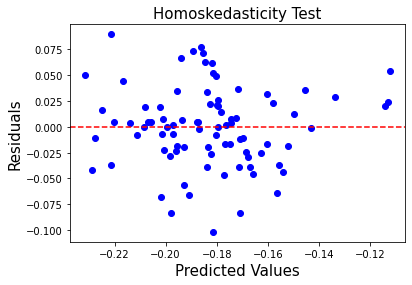

In [ ]:
# Check for Homoskedasticity
import matplotlib.pyplot as plt

# Residuals-Plot for growing Variance Detection
fig, ax = plt.subplots()
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = "blue")
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel("Predicted Values", fontsize = 15)
ax.set_ylabel("Residuals", fontsize = 15)
ax.set_title("Homoskedasticity Test", fontsize = 15)
plt.show()

### **Inference:** 
It can be seen that the data points are spread out which is an indicator of growing variance. Hence, the model is heteroskedastic.

### 2) Fixed Effect

In [ ]:
# Import libraries
from linearmodels import PanelOLS
from linearmodels import RandomEffects

In [ ]:
# Fixed effects model
model_fe = PanelOLS(dep_varnew, indep_varnew, entity_effects = True) 
fe_res = model_fe.fit() 

#print results
print("Summary for Fixed Effect model is:", fe_res)

Summary for Fixed Effect model is:                           PanelOLS Estimation Summary                           
Dep. Variable:               pc_delay   R-squared:                        0.3106
Estimator:                   PanelOLS   R-squared (Between):             -0.5096
No. Observations:                  85   R-squared (Within):               0.3106
Date:                Thu, May 05 2022   R-squared (Overall):              0.2181
Time:                        04:37:07   Log-likelihood                    163.13
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      17.569
Entities:                           5   P-value                           0.0000
Avg Obs:                       17.000   Distribution:                    F(2,78)
Min Obs:                       17.000                                           
Max Obs:                       17.000   F-statistic (robust):             

### **Inference:** 

•	Model is significant with p-value <0.05

•	Log Pilot CASM has a significant positive effect on Percent delay.

•	Log Maintenance CASM has a positive effect on Percent delay but is not significant.


### 3) Random Effect

In [ ]:
# Random effects model
model_re = RandomEffects(dep_varnew, indep_varnew) 
re_res = model_re.fit() 

#print results
print("Summary for Random Effect model is:", fe_res)


Summary for Random Effect model is:                           PanelOLS Estimation Summary                           
Dep. Variable:               pc_delay   R-squared:                        0.3106
Estimator:                   PanelOLS   R-squared (Between):             -0.5096
No. Observations:                  85   R-squared (Within):               0.3106
Date:                Thu, May 05 2022   R-squared (Overall):              0.2181
Time:                        04:37:07   Log-likelihood                    163.13
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      17.569
Entities:                           5   P-value                           0.0000
Avg Obs:                       17.000   Distribution:                    F(2,78)
Min Obs:                       17.000                                           
Max Obs:                       17.000   F-statistic (robust):            

### **Inference:** 

1) We see that this model is resulting the same as Fixed effect model

2) Hence, by comparing all the three models, we say that Fixed effect model is best suitable for this study.

### Conclusion:

There is clear indication of effect of On-time performance on both the Pilot Cost(CASM) and Maintenance Cost(CASM). Therefore, we reject null hypothesis 